## Compute Similarities between images
Using Structural Similarity Index

Importing all necessary package

In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imutils

print('done importing modules')

done importing modules


### Defining Functions
To compare images

In [2]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

### Perform Image Compare
By loading the images

1. Compares itself
2. Compare to Contrast Editing
3. Compare to PS editing (Black box)


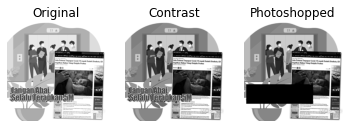

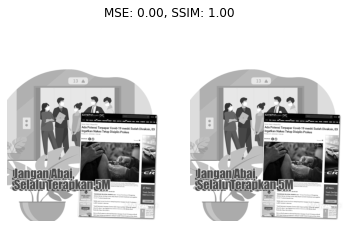

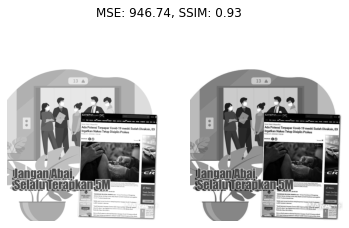

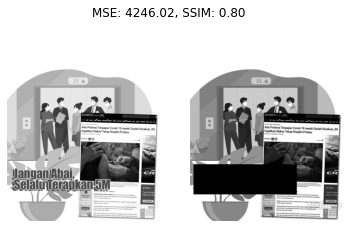

In [3]:
original = cv2.imread("img/sample1-original.jpeg")
contrast = cv2.imread("img/sample1-contrast.png")
shopped = cv2.imread("img/sample1-edited.png")

# normalized, convert to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", shopped)

# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
    
# show the figure
plt.show()

# compare the images
compare_images(original, original, "Original vs. Original")
compare_images(original, contrast, "Original vs. Contrast")
compare_images(original, shopped, "Original vs. Photoshopped")

### Compare using SSIM
between pictures


In [4]:
# (score, diff) = compare_images(original, shopped, 'Original vs Shopped')

(score,diff) = ssim(original, shopped, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.802436152193122


### Generates Contour
To represent the different between images


In [5]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# loop over the contours
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(shopped, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images
cv2.imshow("Original", original)
cv2.imshow("Modified", shopped)
cv2.imshow("Diff", diff)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)

